In [38]:
import csv
import numpy as np
dataset=[]
#extracting the data from the csv file and storing it as a numpy list
with open("housing_prices.csv") as file:
    for i,row in enumerate(csv.reader(file)):
      if i!=0:
        dataset.append([float(x) for x in row])

dataset=np.array(dataset)
dataset=np.hstack((np.ones((dataset.shape[0],1)),dataset))
print(dataset)

#squarefootage dataset
X=dataset[:,:-1]
#prices dataset
y=dataset[:,2]
print(X)
print(y)

[[1.000e+00 1.100e+03 1.990e+05]
 [1.000e+00 1.400e+03 2.450e+05]
 [1.000e+00 1.425e+03 2.300e+05]
 [1.000e+00 1.550e+03 2.150e+05]
 [1.000e+00 1.600e+03 2.800e+05]
 [1.000e+00 1.700e+03 2.950e+05]
 [1.000e+00 1.750e+03 3.450e+05]
 [1.000e+00 1.800e+03 3.150e+05]
 [1.000e+00 1.875e+03 3.250e+05]
 [1.000e+00 2.000e+03 3.600e+05]
 [1.000e+00 2.100e+03 3.500e+05]
 [1.000e+00 2.250e+03 3.850e+05]
 [1.000e+00 2.300e+03 3.900e+05]
 [1.000e+00 2.400e+03 4.250e+05]
 [1.000e+00 2.450e+03 4.150e+05]
 [1.000e+00 2.600e+03 4.550e+05]
 [1.000e+00 2.800e+03 4.650e+05]
 [1.000e+00 2.900e+03 4.950e+05]
 [1.000e+00 3.000e+03 5.100e+05]
 [1.000e+00 3.150e+03 5.450e+05]
 [1.000e+00 3.300e+03 5.700e+05]]
[[1.000e+00 1.100e+03]
 [1.000e+00 1.400e+03]
 [1.000e+00 1.425e+03]
 [1.000e+00 1.550e+03]
 [1.000e+00 1.600e+03]
 [1.000e+00 1.700e+03]
 [1.000e+00 1.750e+03]
 [1.000e+00 1.800e+03]
 [1.000e+00 1.875e+03]
 [1.000e+00 2.000e+03]
 [1.000e+00 2.100e+03]
 [1.000e+00 2.250e+03]
 [1.000e+00 2.300e+03]
 [1.000

In [116]:
#'@' denotes matrix multiplication
#the hypothesis function
def hypothesis(X,theta):
  return X@theta

#the cost function
def cost(X,y,theta):
  return (0.5/float(X.shape[0]))*np.sum(((hypothesis(X,theta)-y)**2))

#for stochastic gradient descent, updating the parameter using single data value at a time
def gradient(X,y,theta):
  return X.T@(hypothesis(X,theta)-y).reshape(1,1)

In [127]:
#gradient descent function in order to minimize the error and determining the parameters-slope and intercept
def SGD(X,y,learning_rate=1e-7,epochs=100):
    theta=np.array([10,100]).reshape(2,1)
    error=[]
    n=X.shape[0]

    for _ in range(epochs):
        #dataset shuffled so that randomness is introduced making the model robust
        indices=np.random.permutation(n)
        X_shuffle=X[indices]
        y_shuffle=y[indices]

        for i in range(n):
            Xi=X_shuffle[i].reshape(1,-1)
            yi=y_shuffle[i].reshape(1,-1)
            theta=theta-learning_rate*gradient(Xi,yi,theta)

        #the cost function value after each epoch is stored in a list
        error.append(cost(X,y,theta))

    return theta,error


Intercept= [10.08046414]
Slope= [171.05945878]
427658.73


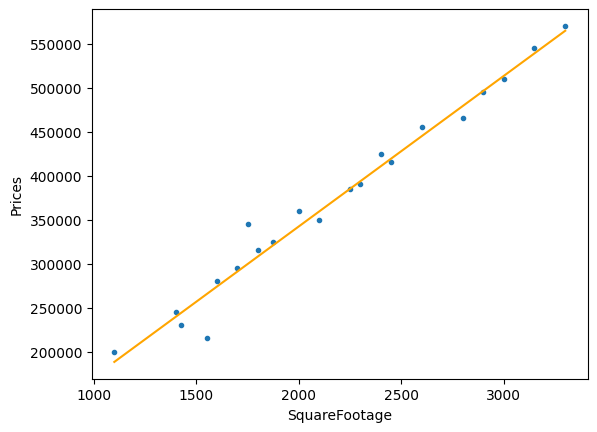

In [128]:
import matplotlib.pyplot as plt
theta,error=SGD(X,y)

print("Intercept=", theta[0])
print("Slope=", theta[1])

#price for 2,500 square feet
ans=theta[0]+theta[1]*2500
print(round(ans[0],2))

plt.scatter(X[:,1],y,marker='.')
x_line=np.linspace(min(X[:,1]),max(X[:,1]),100)
y_line=theta[0]+theta[1]*x_line
plt.plot(x_line,y_line,color='orange')
plt.xlabel('SquareFootage')
plt.ylabel('Prices')
plt.show()
